In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.io import imread
from skimage.transform import resize
from google.colab.patches import cv2_imshow
import pickle
import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
!kaggle datasets download -d bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): Apache 2.0
100% 774M/775M [00:40<00:00, 19.6MB/s]
100% 775M/775M [00:40<00:00, 20.0MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

In [ ]:
dir='/content/PetImages'

In [ ]:
categories = ['Cat', 'Dog']
data = []

for category in categories:
    path = os.path.join(dir, category)
    label=categories.index(category)
    for img in os.listdir(path):
        imgpath = os.path.join(path, img)
        pet_img = cv2.imread(imgpath, 0)
        try:
            pet_img=cv2.resize(pet_img,(50,50))
            image=np.array(pet_img).flatten()

            data.append([image,label])
        except Exception as e:
            pass

print(len(data))

    #     cv2_imshow(pet_img)
    #     break
    # break


24946


In [ ]:
pick_in=open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [ ]:
pick_in=open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.010)

In [ ]:
model=SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain,ytrain)

pick=open('model.sav','wb')
pickle.dump(model,pick)
pick.close()


Accuracy: 0.552
Prediction: Dog


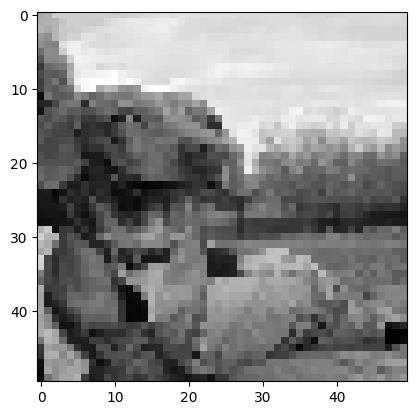

In [ ]:
pick=open('model1.sav','rb')
model=pickle.load(pick)
pick.close()

prediction=model.predict(xtest)
accuracy=model.score(xtest,ytest)
categories=['Cat','Dog']

print('Accuracy:',accuracy)
print('Prediction:',categories[prediction[0]])

mypet=xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()